# Assignment 01: Git Essentials and Python Notebook for Analysis

**Dataset**: Kaggle "Netflix Movies and TV Shows" (netflix_titles.csv)

**Research Questions**:
1. How has the volume of content added to Netflix changed over time?
2. Does the 'type' (Movie vs. TV Show) follow the same trend?


### 1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

print("Libraries loaded successfully.")

Libraries loaded successfully.


### 2. Loading Data Using Relative Path

In [3]:
Data_Dir = Path("data/netflix")
print("Data directory set to: {Data_Dir}")

CSV_PATH = Data_Dir / "netflix_titles.csv"

if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Missing {CSV_PATH}.\n"
        "Ensure the 'data/netflix' folder exists in your project directory."
    )

df = pd.read_csv(CSV_PATH)
df.head()


Data directory set to: {Data_Dir}


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 3. Data Dictionary
**show_id**: Unique identifier for each movie or TV show

**type**: Content classification (movie or TV show)

**title**: The official name of the content

**director**: The person who oversees the content creation and guides the crew 

**cast**: The primary actors, actresses or voice talent

**country**: The country where the production took place

**date_added**: The date the content was added to the Netflix library

**release_year**: The original year the content was released

**rating**: The age-based content rating 

**duration**: Length of the content

**listed_in**: The genre of the content

**description**: A brief summary of the content's plot

### 4. Creating a Custom Function to Aid Analysis

Here, we are using a custom function to categorize the data in "year_added" to five year intervals which we will later use for analysis of content volume over time.


In [4]:
def five_year_interval(year):
    if pd.isna(year):
        return "Unknown"
    try:
        year = int(year)
        start_year = (year // 5) * 5
        end_year = start_year + 4
        return f"{start_year}-{end_year}"
    except ValueError:
        return "Unknown"

### 5. Cleaning the Data

This section will handle data cleaning steps like handling missing values, duplicates etc.

In [5]:
df = df.drop_duplicates() #Removes duplicates

cols_to_fix = ['director', 'cast', 'country']
for col in cols_to_fix:
    df[col] = df[col].fillna('Unknown') #Handles missing values by filling them with 'Unknown'

df = df.dropna(subset=['date_added']) #Removes rows with missing 'date_added' values

df['date_added'] = pd.to_datetime(df['date_added'].str.strip()) #Converts 'date_added' to datetime format, stripping any leading/trailing whitespace

df['year_added'] = df['date_added'].dt.year #Extracts the year from 'date_added' and creates a new column 'year_added'
df['five_year_period'] = df['year_added'].apply(five_year_interval) #Applies the five_year_interval function to the 'year_added' column to create a new column 'five_year_period'

print("Data Cleaning Complete!")
print(f"Remaining Rows: {len(df)}")

Data Cleaning Complete!
Remaining Rows: 8797


### 6. Analysis

##### i. Trend over time: titles per 5-year-interval (parsing date added).

In [6]:
# 1. Grouping the data using our custom 'five_year_period' column
trend_data = df.groupby('five_year_period').size().reset_index(name='total_titles')

# 2. Calculating the percentage growth from the previous period
trend_data['percent_growth'] = trend_data['total_titles'].pct_change() * 100

print("Analysis 1: Content Growth by 5-Year Intervals")
display(trend_data)

Analysis 1: Content Growth by 5-Year Intervals


,five_year_period,total_titles,percent_growth
0,2005-2009,4,NaN
1,2010-2014,52,1200.000000
2,2015-2019,5364,10215.384615
3,2020-2024,3377,-37.043251


##### ii. Comparison of two groups: Movies vs. TV shows

In [7]:
# 1. Creates a table that counts titles by Year and Type
yearly_comparison = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# 2. Compares the two groups (Movies vs TV Shows) using summary statistics
group_comparison = yearly_comparison.describe().T  # .T flips the table for easier reading

# 3. Add a "Total Volume" column to see the overall sum for each group
group_comparison['total_sum'] = yearly_comparison.sum()

print("Analysis 2: Comparison of Volume Metrics (Movies vs TV Shows)")
display(group_comparison[['count', 'mean', 'std', 'max', 'total_sum']])

Analysis 2: Comparison of Volume Metrics (Movies vs TV Shows)


,count,mean,std,max,total_sum
type,,,,,
Movie,14.0,437.928571,573.743237,1424.0,6131
TV Show,14.0,190.428571,244.175131,595.0,2666


### 7. Visualisation

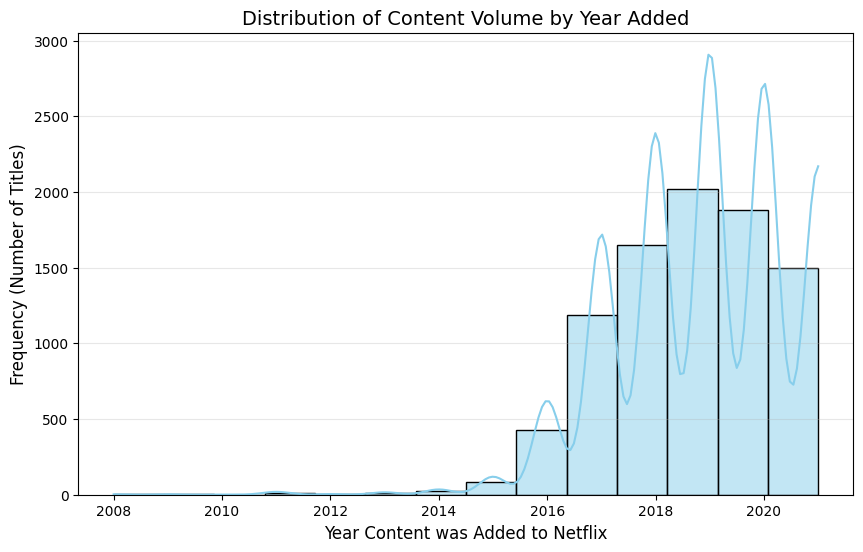

In [8]:
plt.figure(figsize=(10, 6))
# Histogram showing the distribution of the year_added column
sns.histplot(df['year_added'], bins=len(df['year_added'].unique()), color='skyblue', kde=True)

# Requirements: Title and Labels
plt.title('Distribution of Content Volume by Year Added', fontsize=14)
plt.xlabel('Year Content was Added to Netflix', fontsize=12)
plt.ylabel('Frequency (Number of Titles)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Plot Interpretation

This distribution plot illustrates that the vast majority of Netflix's current catalog was added between 2016 and 2021. The sharp peak in the late 2010s shows a high density of additions, confirming that the library's volume is heavily weighted toward recent years rather than a gradual accumulation over time.